### Step 1: Import Libraries:

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

import pickle


### Step 2: Load the Dataset:

In [7]:
df=pd.read_csv('C:/Users/sathi/Downloads/quikr_car.csv')
print(df.head())

                                     name   company  year          Price  \
0    Hyundai Santro Xing XO eRLX Euro III   Hyundai  2007         80,000   
1                 Mahindra Jeep CL550 MDI  Mahindra  2006       4,25,000   
2              Maruti Suzuki Alto 800 Vxi    Maruti  2018  Ask For Price   
3  Hyundai Grand i10 Magna 1.2 Kappa VTVT   Hyundai  2014       3,25,000   
4        Ford EcoSport Titanium 1.5L TDCi      Ford  2014       5,75,000   

   kms_driven fuel_type  
0  45,000 kms    Petrol  
1      40 kms    Diesel  
2  22,000 kms    Petrol  
3  28,000 kms    Petrol  
4  36,000 kms    Diesel  


### Step 3: Data Cleaning:

In [10]:
# Remove 'Ask For Price' and convert to int
df = df[df['Price'] != 'Ask For Price']
df['Price'] = df['Price'].astype(str).str.replace(',', '').astype(int)

# Clean 'kms_driven'
df = df[df['kms_driven'].notna()]
df['kms_driven'] = df['kms_driven'].astype(str).str.replace(' kms', '').str.replace(',', '')
df = df[df['kms_driven'].apply(lambda x: x.isdigit())]
df['kms_driven'] = df['kms_driven'].astype(int)

# Keep only first 3 words in 'name'
df['name'] = df['name'].astype(str).str.split().str.slice(0, 3).str.join(' ')

# Drop missing values
df = df.dropna().reset_index(drop=True)


### Step 4: Outlier Removal:

In [12]:
# Remove extreme price and mileage values
df = df[df['Price'] < 1000000]
df = df[df['kms_driven'] < 300000]


### Step 5: Reduce High Cardinality in 'name' and 'company':

In [15]:
# Keep top 30 most common names
top_names = df['name'].value_counts().nlargest(30).index
df['name'] = df['name'].apply(lambda x: x if x in top_names else 'other')

# Keep top 15 most common companies
top_companies = df['company'].value_counts().nlargest(15).index
df['company'] = df['company'].apply(lambda x: x if x in top_companies else 'other')


### Step 6: Target Encoding Function:

In [18]:
# Encoding categorical columns by their mean target value
def target_encode(col, target):
    return col.map(col.groupby(col).apply(lambda x: target[x.index].mean()))


### Step 7: Apply Target Encoding:

In [21]:
df['name_encoded'] = target_encode(df['name'], df['Price'])
df['company_encoded'] = target_encode(df['company'], df['Price'])
df['fuel_encoded'] = target_encode(df['fuel_type'], df['Price'])


### Step 8: Define Features and Target Variable:

In [24]:
X = df[['year', 'kms_driven', 'name_encoded', 'company_encoded', 'fuel_encoded']]
y = df['Price']


### Step 9: Train-Test Split:

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Step 10: Train Linear Regression Model:

In [30]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

### Step 11: Model Evaluation:

In [33]:
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("✅ R² Score:", r2)
print("📉 RMSE:", rmse)

✅ R² Score: 0.6037582222896741
📉 RMSE: 122666.23832722072


### Step 12: Save the Trained Model to a .pkl File:

In [36]:
with open("car_price_model_target_encoded.pkl", "wb") as f:
    pickle.dump(model, f)

print("📦 Model saved as car_price_model_target_encoded.pkl")

📦 Model saved as car_price_model_target_encoded.pkl


### Step 13: Data Visualization:

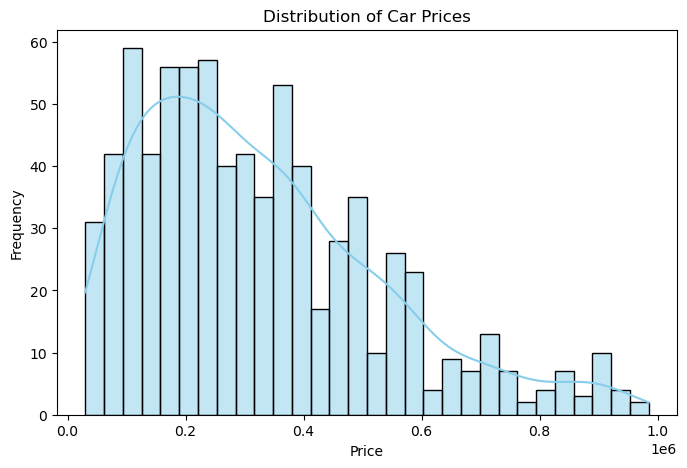

In [41]:
### 📊 1. Distribution of Prices
plt.figure(figsize=(8, 5))
sns.histplot(df['Price'], kde=True, bins=30, color='skyblue')
plt.title("Distribution of Car Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()


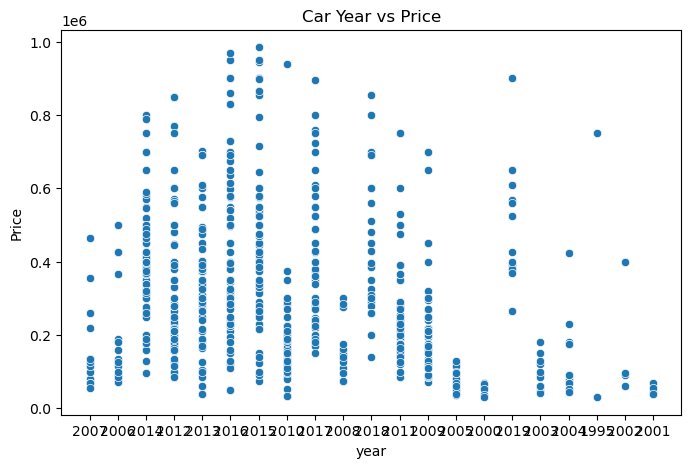

In [43]:
### 📊 2. Year vs Price
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='year', y='Price')
plt.title("Car Year vs Price")
plt.show()


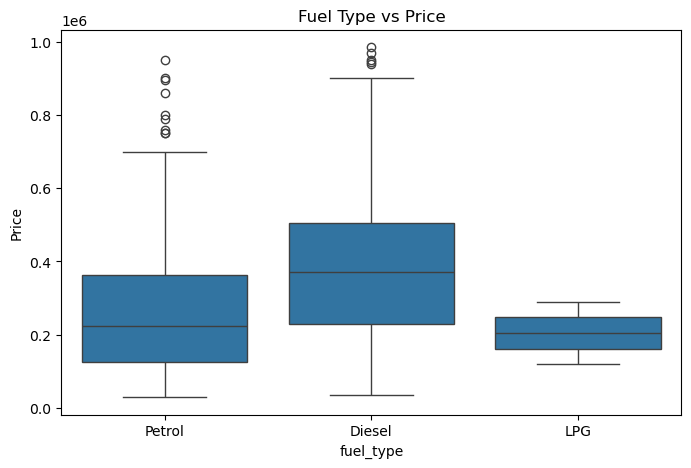

In [45]:
### 📊 3. Fuel Type vs Price:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='fuel_type', y='Price')
plt.title("Fuel Type vs Price")
plt.show()


In [ ]:
### 📊 4. Heatmap of Feature Correlations:

plt.figure(figsize=(8, 6))
sns.heatmap(df[['year', 'kms_driven', 'name_encoded', 'company_encoded', 'fuel_encoded', 'Price']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()
